In this dataset, we will explore on how to customize the consumer music preferences based on their demographics. An additional exploratory feature is to discuss on which cluster of these consumers would contribute most to the revenue of this music store.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Data = pd.read_csv('responses.csv')

General function to select columns

In [3]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names].copy()
    return new_frame

To avoid repetition of the data, we will first perform a feature analysis to remove highly correlated dataset.

In [4]:
selected_columns = ['Dance','Folk','Country','Classical music','Musical'
                   ,'Pop','Rock','Metal or Hardrock','Punk','Hiphop, Rap','Reggae, Ska','Swing, Jazz','Rock n roll'
                   ,'Alternative','Latino','Techno, Trance','Opera','Entertainment spending','Age','Height','Weight','Number of siblings'
                   ,'Gender','Left - right handed','Education','Only child']
MusicPreferencesWithPersona = select_columns(Data, selected_columns)

In [5]:
MusicPreferencesWithPersona.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Opera,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,...,1.0,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,...,1.0,4.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,...,3.0,4.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,...,1.0,3.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,...,2.0,3.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no


In [6]:
MusicPreferencesWithPersona.shape

(1010, 26)

In [7]:
MusicPreferencesWithPersona.isna().sum()

Dance                      4
Folk                       5
Country                    5
Classical music            7
Musical                    2
Pop                        3
Rock                       6
Metal or Hardrock          3
Punk                       8
Hiphop, Rap                4
Reggae, Ska                7
Swing, Jazz                6
Rock n roll                7
Alternative                7
Latino                     8
Techno, Trance             7
Opera                      1
Entertainment spending     3
Age                        7
Height                    20
Weight                    20
Number of siblings         6
Gender                     6
Left - right handed        3
Education                  1
Only child                 2
dtype: int64

# Cleaning dataset

We are going to fill in the average BMI of the people in the demographics.

Place the weight with Na Values to be Zero.

In [8]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Weight'].isna()].head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Opera,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child
137,4.0,3.0,3.0,5.0,5.0,5.0,4.0,2.0,2.0,4.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,right handed,primary school,yes
142,4.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,1.0,3.0,...,1.0,4.0,NaN,NaN,NaN,NaN,male,left handed,primary school,no
164,4.0,2.0,1.0,3.0,2.0,4.0,NaN,1.0,3.0,2.0,...,2.0,4.0,20.0,188.0,NaN,1.0,male,right handed,secondary school,no
209,4.0,3.0,3.0,4.0,3.0,2.0,5.0,4.0,3.0,5.0,...,2.0,4.0,21.0,NaN,NaN,1.0,male,right handed,secondary school,no
276,5.0,3.0,5.0,2.0,2.0,5.0,5.0,4.0,3.0,1.0,...,1.0,5.0,21.0,NaN,NaN,2.0,female,right handed,college/bachelor degree,no


In [9]:
MusicPreferencesWithPersona["Weight"].fillna(0, inplace=True)

In [10]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Height'].isna()].head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Opera,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child
51,3.0,3.0,1.0,4.0,3.0,5.0,4.0,3.0,2.0,2.0,...,2.0,2.0,19.0,NaN,75.0,1.0,female,right handed,secondary school,no
137,4.0,3.0,3.0,5.0,5.0,5.0,4.0,2.0,2.0,4.0,...,2.0,2.0,NaN,NaN,0.0,NaN,NaN,right handed,primary school,yes
142,4.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,1.0,3.0,...,1.0,4.0,NaN,NaN,0.0,NaN,male,left handed,primary school,no
209,4.0,3.0,3.0,4.0,3.0,2.0,5.0,4.0,3.0,5.0,...,2.0,4.0,21.0,NaN,0.0,1.0,male,right handed,secondary school,no
276,5.0,3.0,5.0,2.0,2.0,5.0,5.0,4.0,3.0,1.0,...,1.0,5.0,21.0,NaN,0.0,2.0,female,right handed,college/bachelor degree,no


Let us fill the height of < 100 cm and 0 with 1

In [11]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Height'] < 100,['Height']] = 1
MusicPreferencesWithPersona["Height"].fillna(1, inplace=True)

In [12]:
MusicPreferencesWithPersona.loc[(MusicPreferencesWithPersona['Height']) < 100 & (MusicPreferencesWithPersona['Height'] > 0)]

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Opera,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child


We use the describe function to check the data.

In [13]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Weight'] != 0]['Weight'].describe()

count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64

In [14]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Height'] != 1]['Height'].describe()

count    989.000000
mean     173.626896
std        9.380471
min      148.000000
25%      167.000000
50%      173.000000
75%      180.000000
max      203.000000
Name: Height, dtype: float64

if height is '1' let weight be 0

In [15]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Height'] == 1,['Weight']] = 0

In [16]:
MusicPreferencesWithPersona["BMI"] = MusicPreferencesWithPersona["Weight"]/((MusicPreferencesWithPersona["Height"]/100)**2)

In [17]:
MusicPreferencesWithPersona.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,BMI
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,...,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,18.066167
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,...,4.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,21.829952
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,...,4.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,21.629649
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,...,3.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,19.943213
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,...,3.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,20.415225


In [18]:
MusicPreferencesWithPersona['BMI'].describe()

count    1010.000000
mean       21.179407
std         4.836045
min         0.000000
25%        19.467401
50%        21.258503
75%        23.629490
max        39.183673
Name: BMI, dtype: float64

For BMI that is zero we fill it with the average

In [19]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['BMI'] == 0,['BMI']] = MusicPreferencesWithPersona['BMI'].mean()

Hence we can drop the height and weight now

In [20]:
columnstodrop = ['Height','Weight']

In [21]:
MusicPreferencesWithPersona.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,BMI
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,...,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,18.066167
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,...,4.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,21.829952
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,...,4.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,21.629649
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,...,3.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,19.943213
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,...,3.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,20.415225


In [22]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Age']!=np.nan]['Age'].describe()

count    1003.000000
mean       20.433699
std         2.828840
min        15.000000
25%        19.000000
50%        20.000000
75%        22.000000
max        30.000000
Name: Age, dtype: float64

In [23]:
MusicPreferencesWithPersona["Age"].fillna(MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Age']!=np.nan]['Age'].mean(), inplace=True)

In [24]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Only child'] == 'yes', 'Number of siblings'] = 0

In [25]:
MusicPreferencesWithPersona.loc[MusicPreferencesWithPersona['Number of siblings'].isna()]

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,Entertainment spending,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,BMI
142,4.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,1.0,3.0,...,4.0,20.433699,1.0,0.0,NaN,male,left handed,primary school,no,21.179407
551,3.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,...,3.0,16.000000,1.0,0.0,NaN,female,right handed,secondary school,no,21.179407
902,1.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,3.0,5.0,...,3.0,20.433699,1.0,0.0,NaN,male,right handed,masters degree,no,21.179407
960,4.0,4.0,1.0,5.0,1.0,3.0,5.0,5.0,5.0,3.0,...,2.0,20.433699,1.0,0.0,NaN,female,right handed,masters degree,no,21.179407


In [26]:
MusicPreferencesWithPersona["Number of siblings"].fillna(round(MusicPreferencesWithPersona['Number of siblings'].mean()), inplace=True)

In [27]:
columnstodrop.append('Only child')

In [28]:
#MusicPreferencesWithPersona.loc[(MusicPreferencesWithPersona['Gender']!='female') & (MusicPreferencesWithPersona['Gender']!='male'),['Gender']] = 'female'

In [29]:
MusicPreferencesWithPersona["Gender"].fillna('female', inplace=True)

In [30]:
MusicPreferencesWithPersona["Left - right handed"].fillna('right handed', inplace=True)

In [31]:
#MusicPreferencesWithPersona.loc[(MusicPreferencesWithPersona['Left - right handed']!='left handed') & (MusicPreferencesWithPersona['Left - right handed']!='right handed'),['Left - right handed']] = 'right handed'

In [32]:
MusicPreferencesWithPersona["Education"].fillna('secondary school', inplace=True)

In [33]:
#MusicPreferencesWithPersona.loc[(MusicPreferencesWithPersona['Education']=='0 secondary school'),['Education']] = 'secondary school'

In [34]:
MusicPreferencesWithPersona.isna().sum()

Dance                     4
Folk                      5
Country                   5
Classical music           7
Musical                   2
Pop                       3
Rock                      6
Metal or Hardrock         3
Punk                      8
Hiphop, Rap               4
Reggae, Ska               7
Swing, Jazz               6
Rock n roll               7
Alternative               7
Latino                    8
Techno, Trance            7
Opera                     1
Entertainment spending    3
Age                       0
Height                    0
Weight                    0
Number of siblings        0
Gender                    0
Left - right handed       0
Education                 0
Only child                2
BMI                       0
dtype: int64

In [35]:
MusicPreferencesWithPersona.drop(columnstodrop, axis=1, inplace=True)

In [36]:
print(MusicPreferencesWithPersona.dropna().shape)

(934, 24)


In [37]:
MusicPreferencesWithPersona = MusicPreferencesWithPersona.dropna()

# Feature Analysis

In [38]:
selected_columns = ['Dance','Folk','Country','Classical music','Musical'
                   ,'Pop','Rock','Metal or Hardrock','Punk','Hiphop, Rap','Reggae, Ska','Swing, Jazz','Rock n roll'
                   ,'Alternative','Latino','Techno, Trance','Opera','Entertainment spending']
MusicPreferences = select_columns(MusicPreferencesWithPersona, selected_columns)

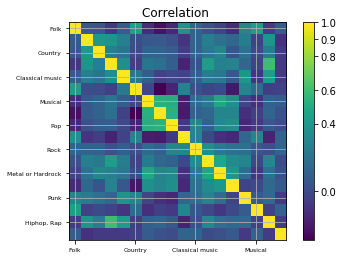

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(MusicPreferences.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=selected_columns
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [40]:
df = MusicPreferences.corr()
subsetdf = df[(df>0.5) & (df <1)]
print(subsetdf)

                        Dance  Folk  Country  Classical music  Musical  Pop  \
Dance                     NaN   NaN      NaN              NaN      NaN  NaN   
Folk                      NaN   NaN      NaN              NaN      NaN  NaN   
Country                   NaN   NaN      NaN              NaN      NaN  NaN   
Classical music           NaN   NaN      NaN              NaN      NaN  NaN   
Musical                   NaN   NaN      NaN              NaN      NaN  NaN   
Pop                       NaN   NaN      NaN              NaN      NaN  NaN   
Rock                      NaN   NaN      NaN              NaN      NaN  NaN   
Metal or Hardrock         NaN   NaN      NaN              NaN      NaN  NaN   
Punk                      NaN   NaN      NaN              NaN      NaN  NaN   
Hiphop, Rap               NaN   NaN      NaN              NaN      NaN  NaN   
Reggae, Ska               NaN   NaN      NaN              NaN      NaN  NaN   
Swing, Jazz               NaN   NaN      NaN        

!!! Will be figuring out how to return the correlation dataframe succintly

From here, we shall remove Punk, Metal or Hardrock which have a higher correlation to Rock and Opera which has a high correlation to classical music.

In [41]:
selected_columns = ['Metal or Hardrock','Punk','Opera']

In [42]:
MusicPreferences = MusicPreferences.drop(selected_columns,axis=1)

In [43]:
MusicPreferences.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Entertainment spending
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,4.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,4.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,3.0


Now we determine feature importance using the ExtraTreeClassifier

In [44]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# load data
array = MusicPreferences.values
X = array[:,0:13]
Y = array[:,14]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.07577238 0.07146891 0.07885999 0.0773629  0.06907087 0.07566767
 0.07237202 0.07762113 0.0805074  0.08068894 0.07747838 0.08524934
 0.07788009]


All features have the same value of importance towards contributing to entertainment spending, hence we are not going to remove any feature.

From here we will proceed to performing cluster analysis

# Cluster Analysis

In [45]:
traindata = MusicPreferences.iloc[:,list(range(0,15))].copy()

In [46]:
traindata.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Entertainment spending
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,4.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,4.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,3.0


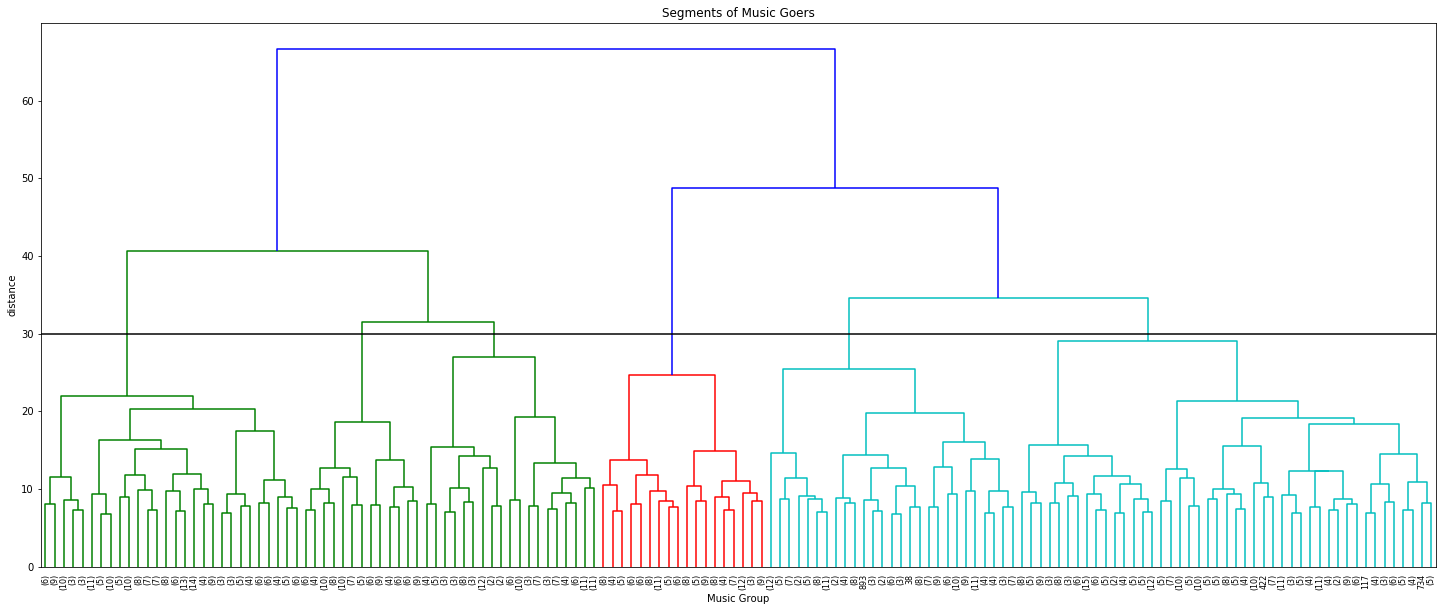

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(traindata, 'ward')

max_d = 30                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Segments of Music Goers')
plt.xlabel('Music Group')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

The dendrogram shows that we can classify the consumers into 6 different clusters

In [48]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=6)
clustering.fit(traindata);

In [49]:
MusicPreferences['Clusters'] = clustering.labels_

In [50]:
MusicPreferences.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Entertainment spending,Clusters
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,4.0,2
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,4.0,4
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,1
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,3.0,0


In [51]:
MusicPreferences.to_csv('clusteranalysis.csv')

# Get top three preferences per cluster

In [52]:
MusicPreferencesClusterSummary = MusicPreferences.copy()

In [53]:
MusicPreferencesClusterSummary.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Entertainment spending,Clusters
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,4.0,2
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,4.0,4
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,1
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,3.0,0


In [54]:
selected_columns = ['Dance','Folk','Country','Classical music','Musical'
                   ,'Pop','Rock','Hiphop, Rap','Reggae, Ska','Swing, Jazz','Rock n roll'
                   ,'Alternative','Latino','Techno, Trance','Entertainment spending']

In [55]:
def getClusterDF(i):
    df =  pd.DataFrame()
    for col in selected_columns:
        colName = MusicPreferencesClusterSummary[MusicPreferencesClusterSummary['Clusters']==i][col].value_counts()
        df = df.append([colName])
    df.fillna(0, inplace=True)
    df2Cluster = (df.iloc[:,0]*1+df.iloc[:,1]*2+df.iloc[:,2]*3+df.iloc[:,3]*4+df.iloc[:,4]*5)/(df.iloc[:,0]+df.iloc[:,1]+df.iloc[:,2]+df.iloc[:,3]+df.iloc[:,4])
    return df2Cluster

In [56]:
clustersummary = pd.DataFrame()
for i in list(range(0,6)):
    dfName = getClusterDF(i)
    clustersummary = clustersummary.append(dfName,ignore_index=True)

C:\Users\Iris\Anaconda3\envs\sa48\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Now we need to label the cluster

In [57]:
clustersummary["Clusters"]=['0','1','2','3','4','5']

In [58]:
clustersummary

,Alternative,Classical music,Country,Dance,Entertainment spending,Folk,"Hiphop, Rap",Latino,Musical,Pop,"Reggae, Ska",Rock,Rock n roll,"Swing, Jazz","Techno, Trance",Clusters
0,2.717557,2.553435,3.354962,2.171756,2.480916,3.366412,2.706107,2.347328,2.309160,2.236641,2.438931,2.309160,2.293893,2.427481,3.297710,0
1,2.327273,3.154545,2.236364,2.036364,2.809091,2.381818,1.600000,2.009091,2.654545,2.672727,1.718182,3.481818,2.727273,2.036364,1.518182,1
2,4.145161,3.419355,2.330645,1.846774,2.959677,2.250000,2.290323,2.104839,2.951613,2.258065,2.677419,4.580645,3.862903,3.040323,2.629032,2
3,3.331579,3.631579,4.031579,2.384211,2.436842,4.110526,2.568421,3.736842,4.100000,2.263158,3.094737,2.384211,3.189474,3.752632,2.368421,3
4,2.487342,2.303797,3.082278,2.297468,2.297468,2.556962,2.512658,2.537975,2.702532,2.518987,2.278481,2.455696,2.253165,2.297468,2.955696,4
5,4.011111,2.877778,3.788889,1.855556,2.488889,3.477778,2.677778,2.966667,2.466667,2.588889,3.066667,2.644444,3.211111,3.655556,4.144444,5


In [59]:
import numpy as np

In [60]:
clustersummarytop3 = clustersummary.set_index('Clusters')
clustersummarytop3 = pd.DataFrame(clustersummary.columns.values[np.argsort(-clustersummarytop3.values, axis=1)[:, :3]], 
                  index=clustersummarytop3.index,
                  columns = ['1st Preference','2nd Preference','3rd Preference']).reset_index()
print (clustersummarytop3)

  Clusters  1st Preference   2nd Preference          3rd Preference
0        0            Folk          Country          Techno, Trance
1        1            Rock  Classical music  Entertainment spending
2        2            Rock      Alternative             Rock n roll
3        3            Folk          Musical                 Country
4        4         Country   Techno, Trance                 Musical
5        5  Techno, Trance      Alternative                 Country


In [61]:
clustersummarytop3.to_csv('clusteranalysistop3.csv')

# Get persona particulars per Cluster

In [62]:
MusicPreferencesWithPersona["Clusters"] = MusicPreferences["Clusters"]

In [63]:
MusicPreferencesWithPersona.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap",...,"Techno, Trance",Opera,Entertainment spending,Age,Number of siblings,Gender,Left - right handed,Education,BMI,Clusters
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,...,1.0,1.0,3.0,20.0,1.0,female,right handed,college/bachelor degree,18.066167,1
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,...,1.0,1.0,4.0,19.0,2.0,female,right handed,college/bachelor degree,21.829952,2
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,...,1.0,3.0,4.0,20.0,2.0,female,right handed,secondary school,21.629649,4
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,...,2.0,1.0,3.0,22.0,0.0,female,right handed,college/bachelor degree,19.943213,1
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,...,2.0,2.0,3.0,20.0,1.0,female,right handed,secondary school,20.415225,0


In [64]:
selected_columns = ['Dance','Folk','Country','Classical music','Musical'
                   ,'Pop','Rock','Metal or Hardrock','Punk','Hiphop, Rap','Reggae, Ska','Swing, Jazz','Rock n roll'
                   ,'Alternative','Latino','Techno, Trance','Opera','Entertainment spending']

In [65]:
MusicPreferencesWithPersona.drop(selected_columns, axis = 1, inplace= True)

In [66]:
MusicPreferencesWithPersona.to_csv('MusicPreferencesWithPersona.csv')